(1, 128, 128) float64 0.0 1.0


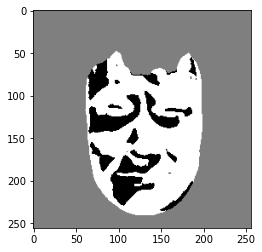

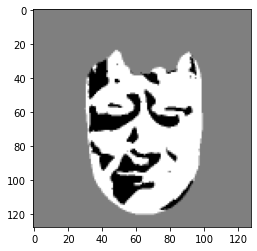

(1, 128, 128) float64 0.0 1.0


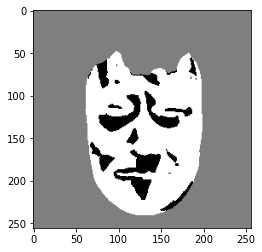

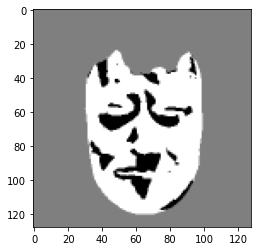

(1, 128, 128) float64 0.0 1.0


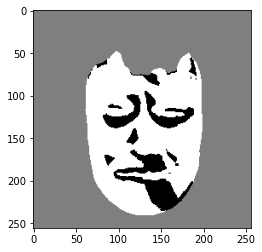

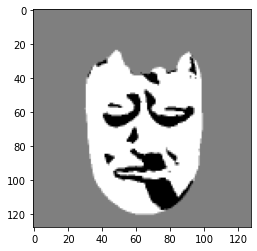

In [7]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

resolution = 128

def prep_proc(img):
    each_cond_img = cv2.resize(img.astype(np.uint8), (resolution, resolution), cv2.INTER_NEAREST)
    assert np.allclose(each_cond_img[..., 0], each_cond_img[..., 1]) and np.allclose(each_cond_img[..., 0], each_cond_img[..., 2])
    each_cond_img = each_cond_img[..., 0:1]
    each_cond_img = np.transpose(each_cond_img, [2, 0, 1])
    out_img = each_cond_img / 255.0
    return out_img

for i in ['./60065_frame0.png', './60065_frame1.png', '60065_frame2.png']:
    img = np.array(Image.open(i).convert('RGB'))
    out_img = prep_proc(img)
    print(out_img.shape, out_img.dtype, out_img.min(), out_img.max())
    
    plt.imshow(img)
    plt.show()
    plt.imshow(out_img[0], cmap='gray')
    plt.show()
    
    np.save(i.replace('.png', '.npy'), out_img)
    